In [78]:
import json
import os
from pandas.io.json import json_normalize
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage
#import squarify
from functools import reduce
path = """my_events/"""
Xg_req = pd.DataFrame(data=None)
for filename in (os.listdir(path)):
    #print(filename)
    
    with open("%s" % path + filename,encoding="utf8") as data_file:    
        data = json.load(data_file)
        df = pd.DataFrame(data=None)
        
        df = json_normalize(data, sep = "_")
        
        #df =  df[(df['type_name'] == "Shot")]
        #df = df.loc[:,['location','shot_body_part_id','shot_end_location','shot_one_on_one','shot_technique_id','shot_type_id','under_pressure','shot_outcome_id']]
        #print(df.shape)
    Xg_req = Xg_req.append(df,ignore_index=True,sort=False)
        #df.drop(df.index, inplace=True)
        
print("done")
df = Xg_req

/tmp/ipykernel_16887/3839686170.py:21: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(data, sep = "_")


done


In [79]:
!pwd

/home/mikolaj/2ait_tech/sportowe/Football-Analytics


In [80]:
d = df.query('shot_outcome_id == 97')
d

id  index  period     timestamp  \
907   27622bee-3beb-45b5-a8e9-4353a3c48cf4    908       1  00:29:57.022   
2589  7ec34223-fb09-47a9-998f-568ba958ef0d   2590       2  00:44:46.358   
2764  f66400ca-02a4-4121-92d4-991cb225d885   2765       2  00:49:59.483   

      minute  second  possession  duration  type_id type_name  ...  \
907       29      57          63  0.602922       16      Shot  ...   
2589      89      46         194  1.080860       16      Shot  ...   
2764      94      59         209  0.663063       16      Shot  ...   

      substitution_replacement_name 50_50_outcome_id  50_50_outcome_name  \
907                             NaN              NaN                 NaN   
2589                            NaN              NaN                 NaN   
2764                            NaN              NaN                 NaN   

     foul_committed_offensive  foul_committed_card_id  \
907                       NaN                     NaN   
2589                      NaN                     NaN   
2764                      NaN                     NaN   

     foul_committed_card_name  pass_inswinging shot_redirect block_save_block  \
907                       NaN              NaN           NaN              NaN   
2589                      NaN              NaN           NaN              NaN   
2764                      NaN              NaN           NaN              NaN   

     pass_goal_assist  
907               NaN  
2589              NaN  
2764              NaN  

[3 rows x 117 columns]

In [81]:
def draw_pitch(ax):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    Pitch = Rectangle([0,0], width = 120, height = 80, fill = False)
    #Left, Right Penalty Area and midline
    LeftPenalty = Rectangle([0,22.3], width = 14.6, height = 35.3, fill = False)
    RightPenalty = Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False)
    midline = ConnectionPatch([60,0], [60,80], "data", "data")

    #Left, Right 6-yard Box
    LeftSixYard = Rectangle([0,32], width = 4.9, height = 16, fill = False)
    RightSixYard = Rectangle([115.1,32], width = 4.9, height = 16, fill = False)


    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black", fill = False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    #Penalty spots and Arcs around penalty boxes
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")
    leftArc = Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")
    
    element = [Pitch, LeftPenalty, RightPenalty, midline, LeftSixYard, RightSixYard, centreCircle, 
               centreSpot, rightPenSpot, leftPenSpot, leftArc, rightArc]
    for i in element:
        ax.add_patch(i)

In [82]:
player_name = 'Kit Graham'

In [83]:
def draw_passes(p_name, position, team, type_name, period):
    ozil_pass  = df[(df.type_name == type_name) &  (df.player_name == p_name)  &  (df.period == period) ]
    pass_column = [i for i in df.columns if i.startswith("pass")]
    ozil_pass = ozil_pass[["id", "period", "timestamp", "location", f'{type_name.lower()}_end_location', "pass_recipient_name"]]
    ozil_pass.head()
    fig=plt.figure() #set up the figures
    fig.set_size_inches(7, 5)
    ax=fig.add_subplot(1,1,1)
    draw_pitch(ax) #overlay our different objects on the pitch
    plt.ylim(-2, 82)
    plt.xlim(-2, 122)
    #plt.plot(x_axis,y_axis,'ro')
    #plt.plot(x,y,'bo')
    #plt.axis('off')

    for i in range(len(ozil_pass)):
        # annotate draw an arrow from a current position to pass_end_location
        ax.annotate("", xy = (ozil_pass.iloc[i][f'{type_name.lower()}_end_location'][0], ozil_pass.iloc[i][f'{type_name.lower()}_end_location'][1]), xycoords = 'data',
                xytext = (ozil_pass.iloc[i]['location'][0], ozil_pass.iloc[i]['location'][1]), textcoords = 'data',
                arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"),)
    plt.title(f"{player_name} Position: {position}, Team: {team}, Type: {type_name}")
    plt.show()


    fig, ax = plt.subplots()
    fig.set_size_inches(7, 5)

    x_coord = [i[0] for i in ozil_pass["location"]]
    y_coord = [i[1] for i in ozil_pass["location"]]

    #shades: give us the heat map we desire
    # n_levels: draw more lines, the larger n, the more blurry it looks
    sns.kdeplot(x_coord, y_coord, shade = "True", color = "black", n_levels = 30)
    plt.show()



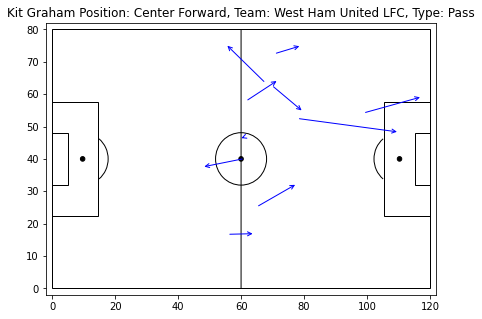

/home/mikolaj/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


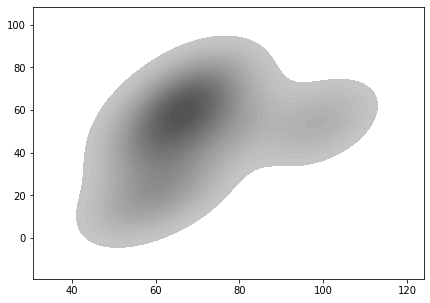

In [84]:
draw_passes("Martha Thomas", 'Center Forward', 'West Ham United LFC', type_name="Pass", period=1)


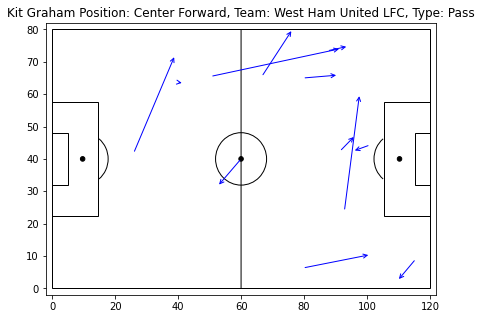

/home/mikolaj/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


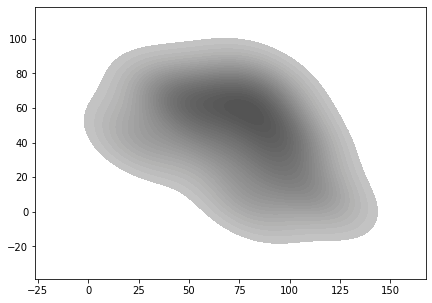

In [85]:
draw_passes("Martha Thomas", 'Center Forward', 'West Ham United LFC', type_name="Pass", period=2)

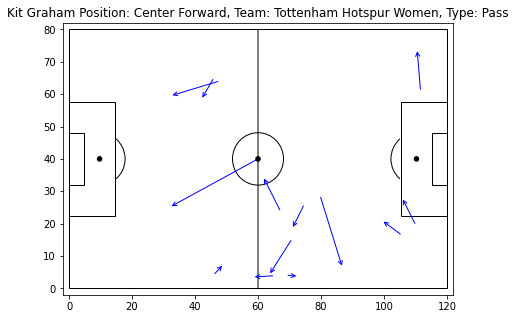

/home/mikolaj/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


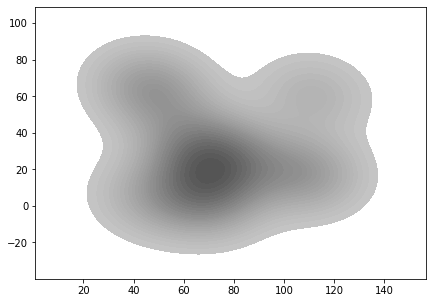

In [86]:
draw_passes("Rianna Dean", 'Center Forward', 'Tottenham Hotspur Women', type_name="Pass", period=1)


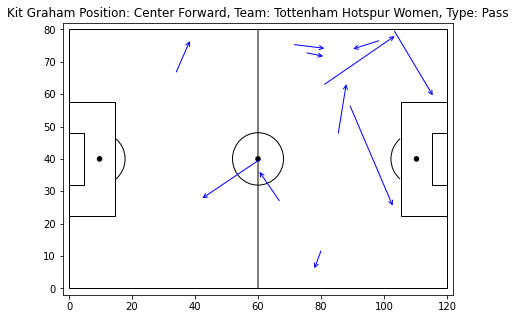

/home/mikolaj/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


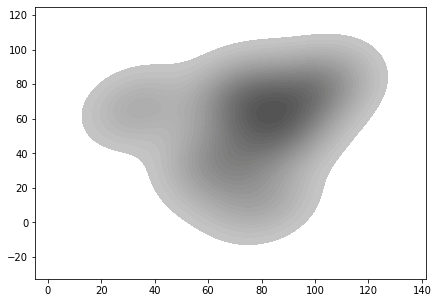

In [87]:
draw_passes("Rianna Dean", 'Center Forward', 'Tottenham Hotspur Women', type_name="Pass", period=2)


# Wnioski:
Obie zawodniczki poruszały się dosyć defensywnie jak na napastniczki, szczególnie Martha Thomas zachowywała defensywę w pierwszej połowie. Jednakże w drugie połowie widać bardziej ofensywną gre u obu zawodniczek

Martha Thomas, więcej podań wykonywała na lewą stronę boiska, a Rianna Dean w pierwszej połowie na prawą, a w drugiej połowie na lewą

